<center>

# <span style="color:red; font-size:70px;"> Coarse graining</span>

</center>

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from collections import Counter

norm = mcolors.Normalize(vmin=-1, vmax=1)

In [2]:
def coarse_graining(config, dim_clust):

    N1 = int(np.floor(len(config)/dim_clust))
    new_mod = np.zeros(shape = (N1, N1))

    for i in range(0, N1):
        for j in range(0, N1):
            appo = np.sum(config[i * dim_clust : (i+1) * dim_clust, j * dim_clust: (j+1) * dim_clust])

            if appo > 0:
                new_mod[i, j] = 1
            elif appo < 0:
                new_mod[i, j] = -1
            else:
                if rd.uniform(0, 1) >= 0.5:
                    new_mod[i, j] = 1
                else:
                    new_mod[i, j] = -1

    return new_mod

In [3]:
def get_sizes(labels):
    #reshape labels, perché diventi un array monodimensionale
    labels_1d = labels.reshape(-1) 
    #creo lista di size
    sizes = []
    counter = Counter(labels_1d)
    #conto occorrenze label
    for key in counter:
        size = counter[key] 
        sizes.append(size)
    return sizes

<center>

# <span style="color:blue; font-size:50px;"> T = 2.0</span>

</center>

In [4]:
conf = np.loadtxt("cg/conf_2.0.out")
m = np.mean(np.mean(conf))

### Coarse graining

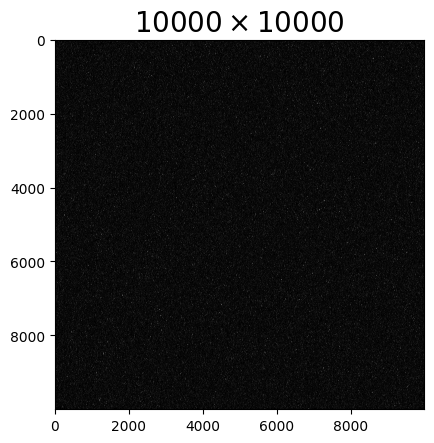

In [5]:
plt.imshow(conf, cmap="binary", norm=norm)
plt.title(r"$10000 \times 10000$", fontsize = 20)

plt.show()

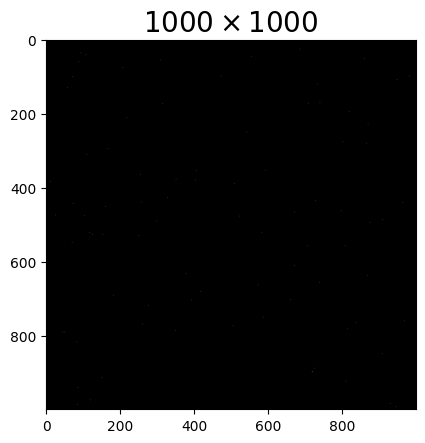

In [6]:
conf1 = coarse_graining(conf, 10)

m = np.mean(np.mean(conf1))
plt.imshow(conf1, cmap="binary", norm=norm)
plt.title(r"$1000 \times 1000$", fontsize = 20)

plt.show()

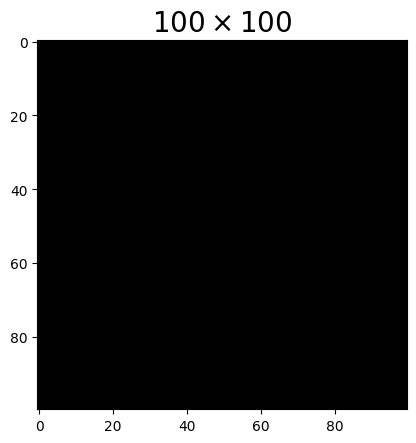

In [7]:
conf2 = coarse_graining(conf1, 10)

m = np.mean(np.mean(conf2))
plt.imshow(conf2, cmap="binary", norm=norm)
plt.title(r"$100 \times 100$", fontsize = 20)

plt.show()

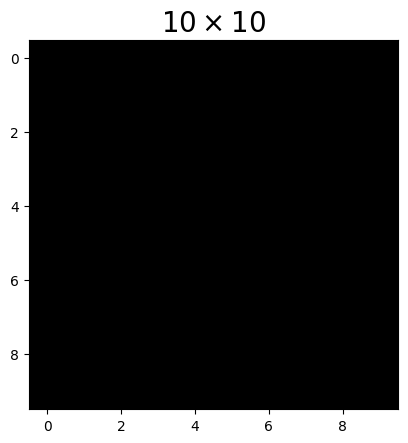

In [8]:
conf3 = coarse_graining(conf2, 10)

m = np.mean(np.mean(conf3))
plt.imshow(conf3, cmap="binary", norm=norm)
plt.title(r"$10 \times 10$", fontsize = 20)

plt.show()

### Dimensione cluster

<center>

# <span style="color:blue; font-size:50px;"> T = Tc</span>

</center>

### Coarse graining

In [4]:
conf = np.loadtxt("../conf_Tc.out")
m = np.mean(np.mean(conf))

print(f"La magnetizzazione è pari a: {round(m, 4)}")

La magnetizzazione è pari a: 0.3387


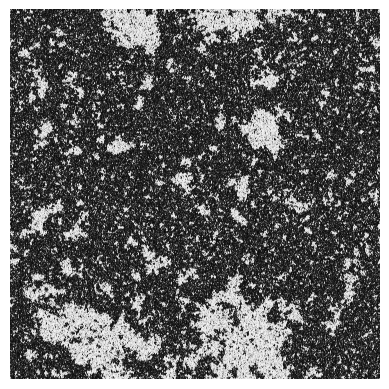

In [5]:
plt.imshow(conf, cmap="binary", norm=norm)

plt.axis('off')
plt.show()

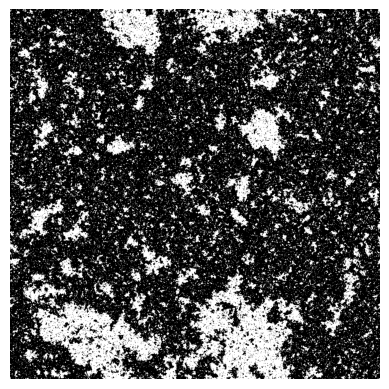

In [6]:
conf1 = coarse_graining(conf, 10)

m = np.mean(np.mean(conf1))
plt.imshow(conf1, cmap="binary", norm=norm)

plt.axis('off')
plt.show()

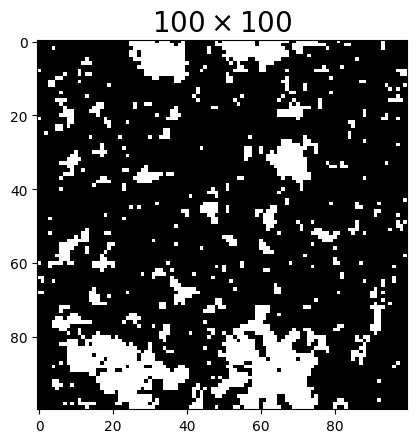

In [7]:
conf2 = coarse_graining(conf1, 10)

m = np.mean(np.mean(conf2))
plt.imshow(conf2, cmap="binary", norm=norm)
plt.title(r"$100 \times 100$", fontsize = 20)

plt.show()

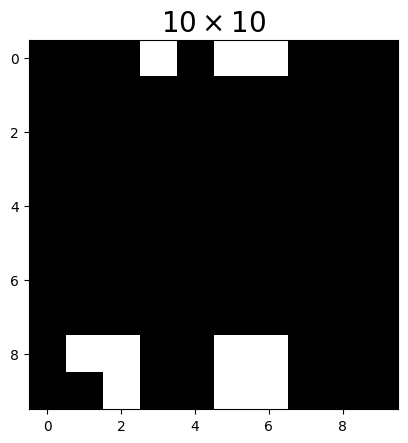

In [8]:
conf3 = coarse_graining(conf2, 10)

m = np.mean(np.mean(conf3))
plt.imshow(conf3, cmap="binary", norm=norm)
plt.title(r"$10 \times 10$", fontsize = 20)

plt.show()

### Dimensione cluster

In [9]:
lab = np.loadtxt("../lab_Tc.out")
dim_Tc = get_sizes(lab)

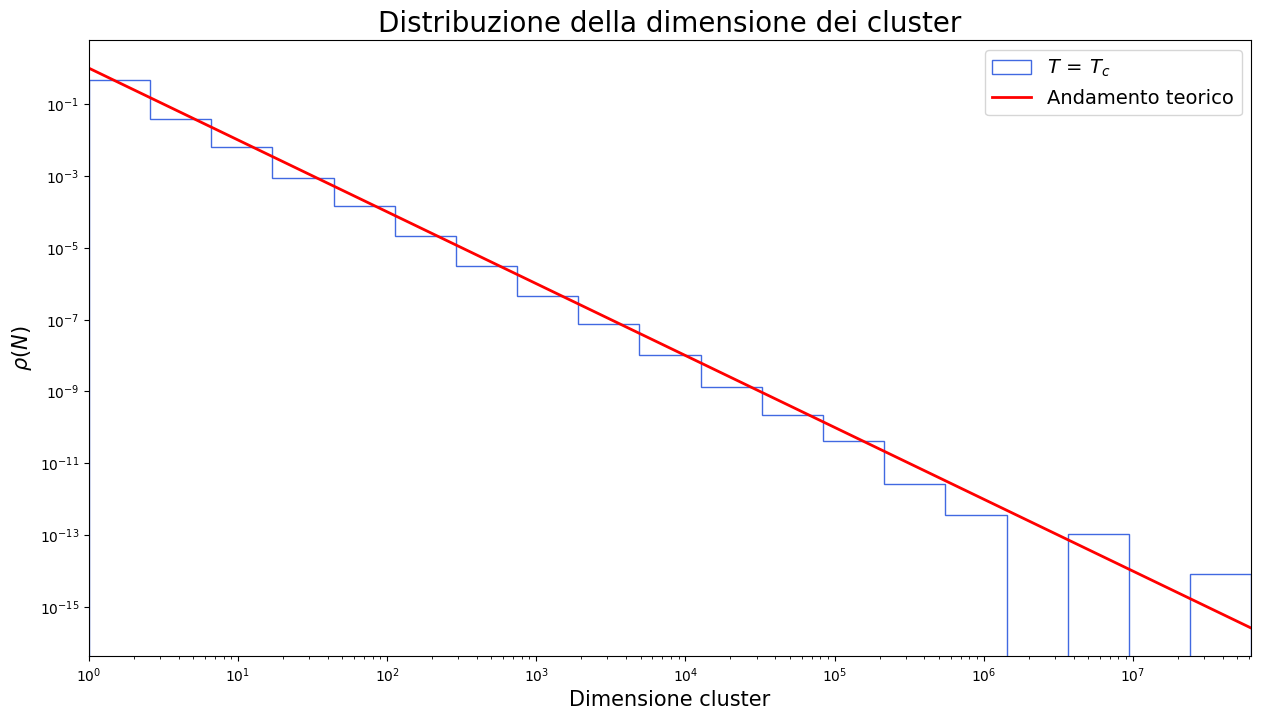

In [10]:
bins = np.geomspace(min(dim_Tc), max(dim_Tc), num=20)

teor = np.array([
    1/t**2
    for t in bins
])


fig = plt.figure(figsize=(15, 8))
plt.hist(dim_Tc, bins=bins, histtype="step", color="royalblue", density = True, label=r"$T\,=\,T_c$")
plt.plot(bins, teor, color = "red", lw = 2, label = "Andamento teorico")
plt.xscale("log")
plt.yscale("log")
plt.xlim(min(dim_Tc), max(dim_Tc))
plt.title("Distribuzione della dimensione dei cluster", fontsize = 20)
plt.xlabel("Dimensione cluster", fontsize = 15)
plt.ylabel(r"$\rho\left(N\right)$", fontsize = 15)

plt.legend(loc = 'best', fontsize = 14)
plt.show()

<center>

# <span style="color:blue; font-size:50px;"> T = 3.0</span>

</center>

In [16]:
conf = np.loadtxt("cg/conf_3.0.out")
m = np.mean(np.mean(conf))

print(f"La magnetizzazione è pari a: {round(m, 4)}")

La magnetizzazione è pari a: 0.0004


### Coarse graining

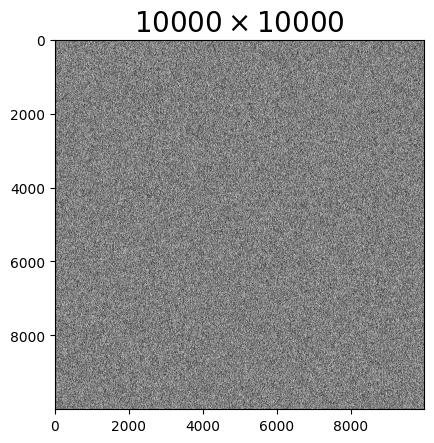

In [17]:
plt.imshow(conf, cmap="binary", norm=norm)
plt.title(r"$10000 \times 10000$", fontsize = 20)

plt.show()

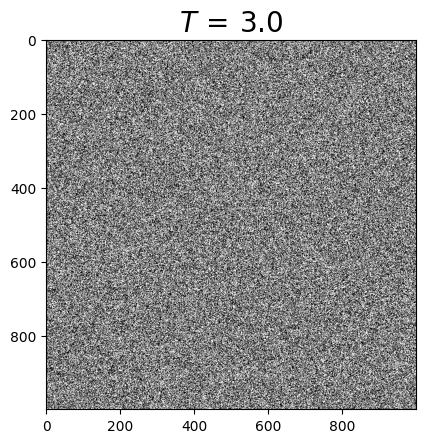

In [18]:
conf1 = coarse_graining(conf, 10)

m = np.mean(np.mean(conf1))
plt.imshow(conf1, cmap="binary", norm=norm)
plt.title(r"$T\,=\,3.0$", fontsize = 20)

plt.show()

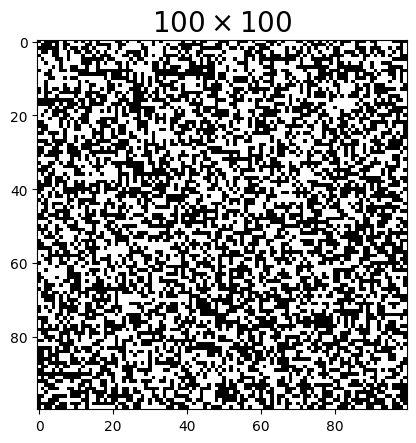

In [19]:
conf2 = coarse_graining(conf1, 10)

m = np.mean(np.mean(conf2))
plt.imshow(conf2, cmap="binary", norm=norm)
plt.title(r"$100 \times 100$", fontsize = 20)

plt.show()

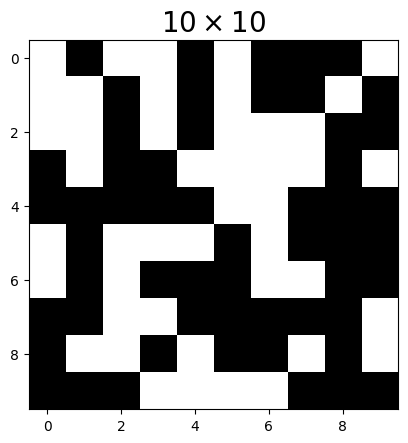

In [20]:
conf3 = coarse_graining(conf2, 10)

m = np.mean(np.mean(conf3))
plt.imshow(conf3, cmap="binary", norm=norm)
plt.title(r"$10 \times 10$", fontsize = 20)

plt.show()

### Dimensione cluster